##### 로지스틱회귀
```
공부한시간 데이터를 보고 합격여부를 예측
공부시간에 비례해서 점수를 부여
공부1시간에 10점을 부여
--> 선형 방정식
합격점수(z) = w*(공부시간) + b
w(가중치) : 중요도  1시간당 점수(10점)
b(편향) : 기본점수(-50, 5시간은 공부해야 0점)

문제점 : 합격점수에 해당하는 100점이 나올수도 있지만 -200점이 나올수도 있음...
분류를 하려면 즉 합격 불합격판단... 우리가 원하는 것은 방정식의 값으로 확률을 계산(0 ~ 100%)
```
##### 점수를 확률로 바꿔야한다.(시그모이드 함수)  0 ~ 1사이의 값으로 변경
```
합격확률 = 시그모이드(z) = 1 / 1 + e^-z
합격점수가 높으면 1에 가깝고
낮으면 0에 가깝다.
합격점수가 0이면 정확히 0.5(50%)  - 임계값
```
##### 비용함수(손실함수) : 모델이 얼마나 틀렸는지 측정  로지스틱은 로그함수를 사용
```
합격(정답=1)
모델이 99% 합격예측 == > 벌점은 거의 0점
모델이 1% 합격예측 == > 벌점은 크게(무한대에 가깝게)

불합격(정답 = 0)
모델이 1%로 합격을 예측 -> 잘 맞춤 벌점이 거의 0점
모델이 99%로 합격을 예측 -> 완전 틀림 벌점을 아주크게

log loss 원리 
w,b를 찾음... 손실함수를 이용해서 비용이 가장낮을때 
```
##### 비용이 최저인 값을 찾아나가는 과정 : 경사하강법

##### 너무 완벽한 모델..(학습에 대해서)
```
규제(Regularization) 모델이 너무 복잡해 지지 않도록 패널티 또는 단순함에 대한 보너스
L2규제(Ridge) : w(중요도)값이 너무커지는 것을 막는다 . 가중치(w) 제곱의 합을 패널티로 추가
L1규제(Lasso) : 어떤 특징이 별로 안중요할거 같은.... 그냥 w(중요도) 그냥 0으로 만든다. 불필요한 특징을 제거하는 효과  가중치들의 절대값의 합을 패널티로 추가 - feature selecter 역활도 겸함
```
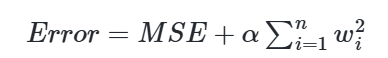



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

clr = LogisticRegression(max_iter=10000)
clr.fit(x_train,y_train)
predict = clr.predict(x_test)
print(predict[:5],  y_test[:5])
predict_proba = clr.predict_proba(x_test)
predict_proba[:5]



[1 1 1 1 0] [1 1 1 1 0]


array([[5.60243299e-05, 9.99943976e-01],
       [9.72401121e-05, 9.99902760e-01],
       [1.17191306e-07, 9.99999883e-01],
       [1.05433203e-03, 9.98945668e-01],
       [9.88019909e-01, 1.19800905e-02]])

In [1]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")

In [2]:
# 과적합을 임의뢰 만들어서 시각화...
# 1. 규제 알고리즘을 적용
# 2. 모델을 경량화.. 모델의 복잡도를 높이는 요소를 제거...
# 3. 추가 데이터를 투입해서 학습

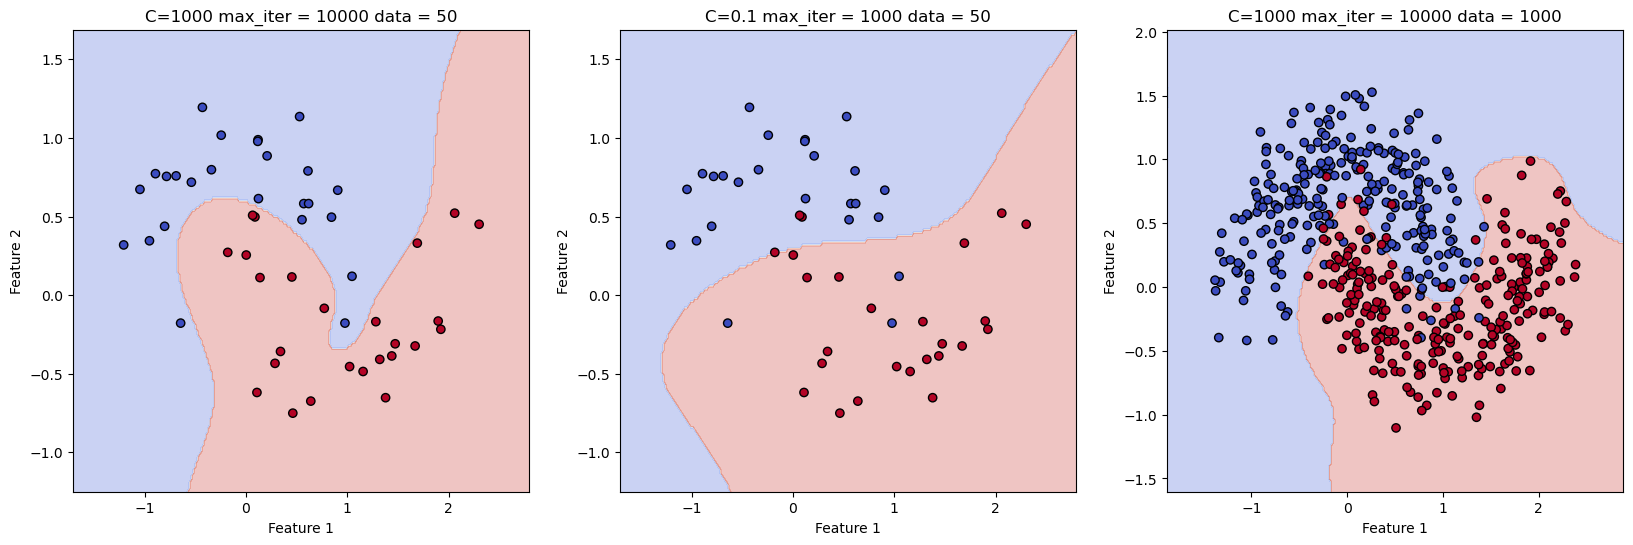

In [20]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
# 과접합 모델
X_small, y_small  = make_moons(n_samples= 50, noise=0.25,random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_small = poly.fit_transform(X_small)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_small = scaler.fit_transform(X_poly_small)
# 모델 훈련(데이터 50, 약한 규제)
log_reg_overfit = LogisticRegression(C=1000,max_iter=10000,random_state=45)  # C가 규제강도. 클수록 규제를 약하게  max_iter는 학습횟수
log_reg_overfit.fit(X_scaled_small, y_small)
plot_decision_boundary(log_reg_overfit, X_small, y_small,poly,scaler,'C=1000 max_iter = 10000 data = 50', axes[0])



# 규제 적용(데이터 50, 강한 규제)
log_reg_regulation = LogisticRegression(C=0.1,max_iter=1000,random_state=45) 
log_reg_regulation.fit(X_scaled_small, y_small)
plot_decision_boundary(log_reg_regulation, X_small, y_small,poly,scaler,'C=0.1 max_iter = 1000 data = 50', axes[1])



# 데이터를 추가(데이터 1000, 약하게)
X_large, y_large  = make_moons(n_samples= 500, noise=0.25,random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_large = poly.fit_transform(X_large)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_large = scaler.fit_transform(X_poly_large)
# 모델 훈련(데이터 1000, 약한 규제)
log_reg_moredata = LogisticRegression(C=1000,max_iter=10000,random_state=45)  # C가 규제강도. 클수록 규제를 약하게  max_iter는 학습횟수
log_reg_moredata.fit(X_scaled_large, y_large)
plot_decision_boundary(log_reg_moredata, X_large, y_large,poly,scaler,'C=1000 max_iter = 10000 data = 1000', axes[2])